# Solving a Markowitz Portfolio Optimization Problem with SciPy

A Portfolio optimization problem can be presented by the following optimization problem:
$$
\begin{equation}
\begin{array}
\displaystyle \min\limits_\mathbf{x} & \sigma_\text{Portfolio}^2=\mathbf{x} \cdot \mathbf{C} \cdot \mathbf{x}^\text{T} \\
\textrm{s.t.}                & \sum_{i=1}^{N} x_i  = 1 \\
                             & \mathbf{x} \cdot \mathbf{r}^\text{T} \geq r_\text{Target} \\
                             & \mathbf{x} \geq \mathbf{0} \\
\end{array}
\end{equation}
$$
Here $\mathbf{C}$ is the covariance matrix, $\mathbf{x}$ are the weights of the stocks or assets in the portfolio, $\sigma_\text{Portfolio}^2$ is the portfolio variance, $r$ represents the expected returns of the stocks/assets, and $r_\text{Target}$ is the return target.

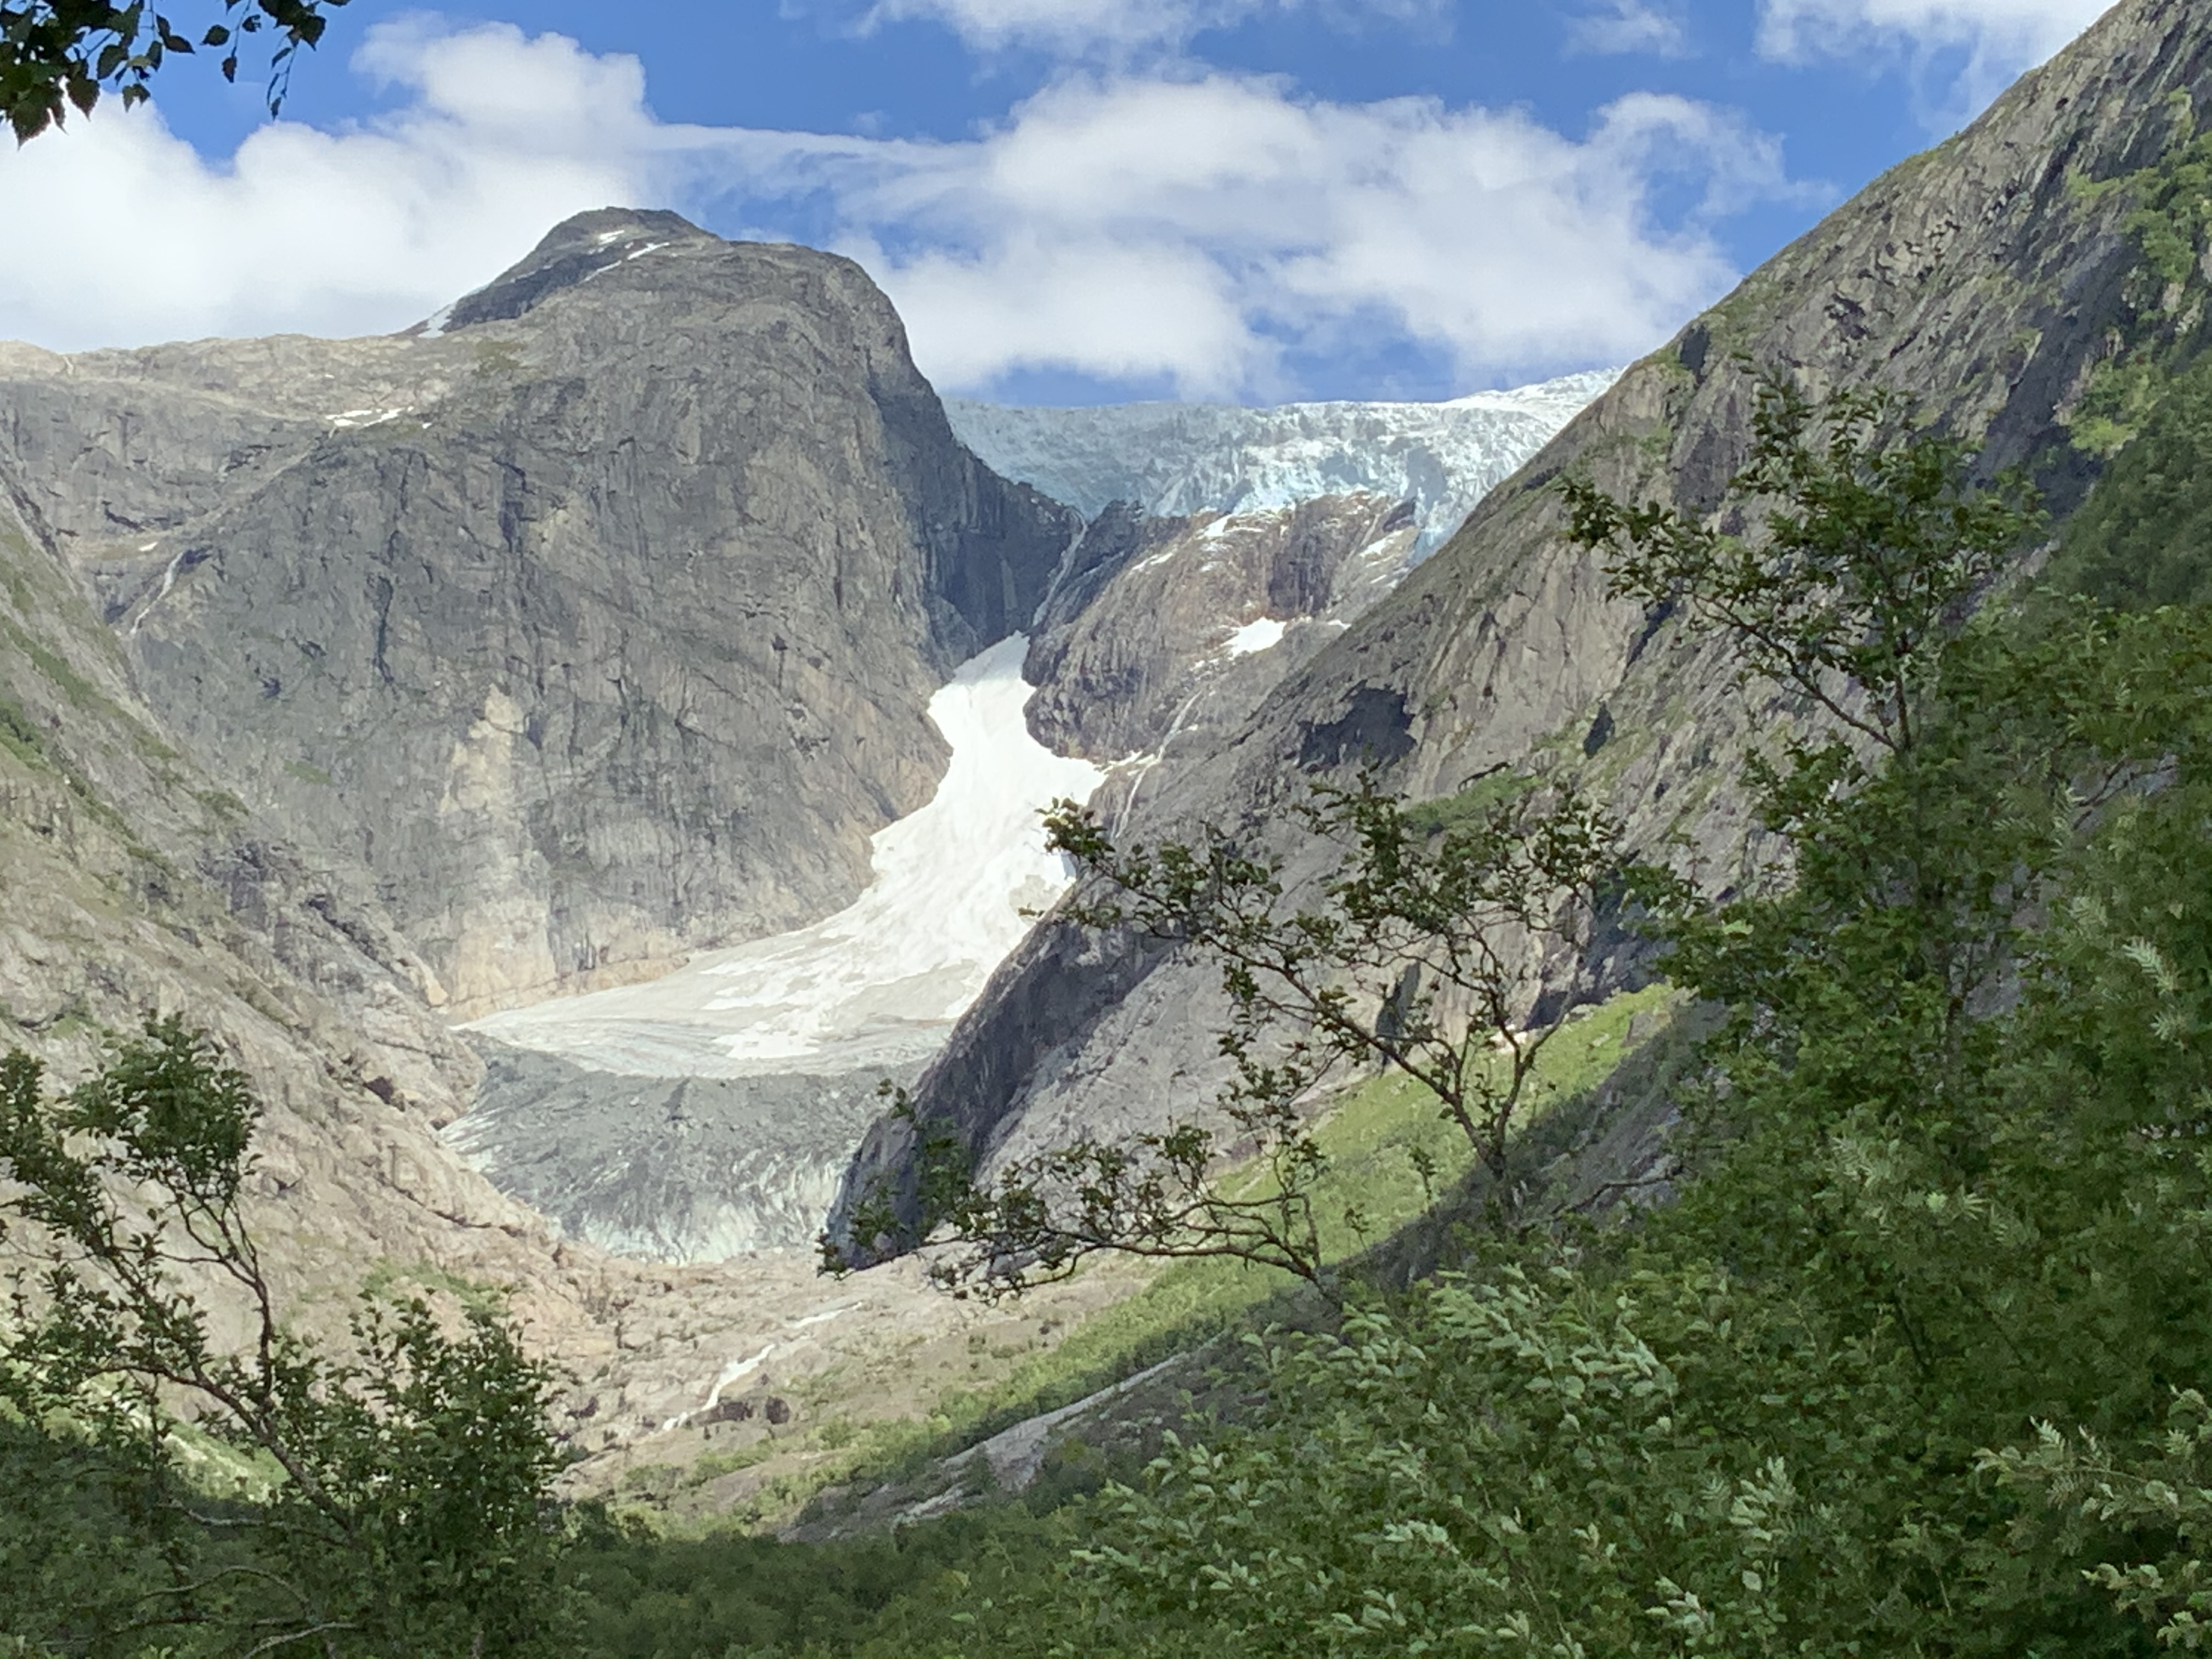

We will use the `SciPy` (Scientific Python) library. And from this library we will use the `optimize` module, and more particularly the `minimize` submodul/function. If you do not have the `SciPy` package from before, then you can install it by running the following code:

```
! pip install scipy
```


Let us now import the relevant modules/packages. In addition to `SciPy` we will use `NumPy` for dealing with vectors (arrays) and (matrices).

In [1]:
from scipy.optimize import minimize
import numpy as np

Let us here define the variables and parameters that are used.

In [2]:
x = np.random.rand(3)
r = np.array([0.10, 0.25, 0.20])
C = np.matrix([[0.14, 0.12, 0.08], [0.12, 0.17, 0.18], [0.08, 0.18, 0.25]])
target = 0.14

Let us first define our objective function:

In [3]:
def objective(x,C):
    portvar=x@C@x
    # Alternatively, we can use: portvar=np.dot(np.dot(x,C),x)
    return portvar[0,0]

Now we define the constraint which will asure that all the weights add to 100 %:

In [4]:
def budget(x):
    return sum(x)-1

Now we will define the constraint for the return target:

In [5]:
def targetReturn(x,r,target):
    return x@r-target

Let us qickly check if the calculations are reasonable. 

In [8]:
print("The objective value is ", objective(x,C))
print("The budget deviation is ", budget(x))
print("The deviation from the target return is ", targetReturn(x,r,target))

The objective value is  0.36903615964201464
The budget deviation is  0.5434808167143248
The deviation from the target return is  0.14962086972398836


The constraints need to be defined like a dictionary. **Note** that we have to specify which of the input parameters to the functions are not decision variables. Pure parameters are specified by args. Here this needs to be done for the contraints, and below it will be done for all the parameters in the objective function.

In [9]:
constraint_1 = {"type": "eq", "fun": budget}
constraint_2 = {"type": "ineq", 'fun': targetReturn, "args": (r,target)}

Now we will join these two constraints into one array:

In [10]:
constraints=[constraint_1, constraint_2]

In the case that short sales are not allowed, the weights should be non-negative. Let us therefore add a bound on $\mathbf{x}$:

In [11]:
# bounds = [(-np.inf, np.inf) for i in x]  # Short Sales allowed.
bounds = [(0, np.inf) for i in x]  # Short sales not allowed.

Now we will solve the problem:

In [13]:
result = minimize(objective, x, method='SLSQP', args=C, bounds=bounds, constraints=constraints)

Now we will print the results.

In [14]:
print(result)

     fun: 0.12704175824557762
     jac: array([0.2443077 , 0.28096704, 0.26874725])
 message: 'Optimization terminated successfully'
    nfev: 28
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.64395605, 0.0879121 , 0.26813185])


Now we will assign the weights, and print the solution:

In [15]:
x=result['x']

In [16]:
print("The optimal weights are", x)
print("The expected potfolio return is ", x@r)
print("The portfolio variance is ", objective(x,C))

The optimal weights are [0.64395605 0.0879121  0.26813185]
The expected potfolio return is  0.14000000001562785
The portfolio variance is  0.12704175824557762


# THE END